# 이미지를 이해하고 레이블을 달아주는 모델 (ResNet)
## 사전 학습 모델 불러오기

In [1]:
from torchvision import models

In [2]:
dir(models) #

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights',
 'RegNet_X_1_6GF_Weights',
 'R

In [3]:
alexnet=models.AlexNet()

In [4]:
resnet=models.resnet101(pretrained=True)

C:\Users\Eunji\miniconda3\envs\ML\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Eunji\miniconda3\envs\ML\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 전처리 모듈

In [6]:
from torchvision import transforms
preprocess= transforms.Compose([
    transforms.Resize(256),            # 입력이미지 크기 256 * 256
    transforms.CenterCrop(224),        # 중심으로 부터 224 * 224로 잘라냄
    transforms.ToTensor(),             # 파이토치 다차원 배열(텐서) 전환
    transforms.Normalize(              # 지정된 평균과 표준편차로 RGB 정규화
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

In [7]:
from PIL import Image
img = Image.open("Data/bobby.jpg")

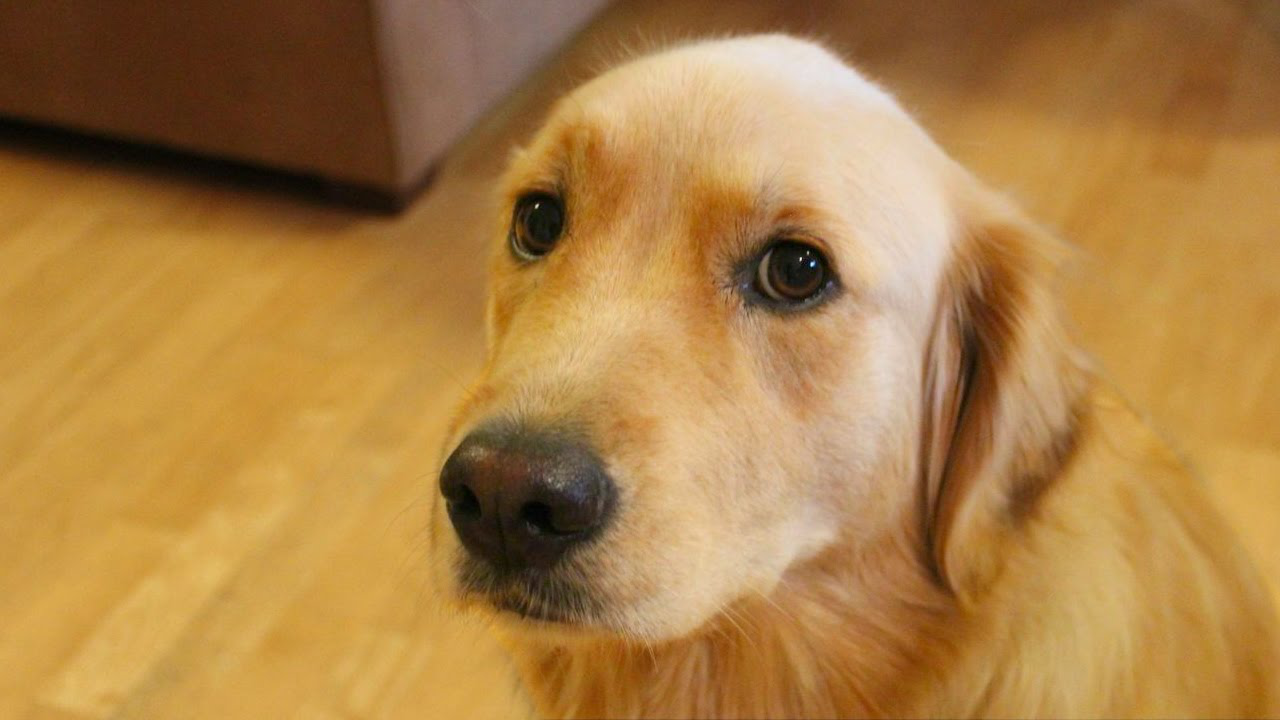

In [8]:
img

In [9]:
img_t=preprocess(img) # 파이프라인에 이미지 통과

## 모델 실행

In [21]:
import torch
batch_t=torch.unsqueeze(img_t,0)    # 배치화

In [11]:
resnet.eval() 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
out=resnet(batch_t)

In [13]:
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5183e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0061e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0450e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

## 레이블 불러오기

In [14]:
with open("data/p1ch2/imagenet_classes.txt") as f:
    labels=[line.strip() for line in f.readlines()] # 이미지넷 데이터 클래스에 대한 1000개 레이블이 담긴 파일

In [15]:
_, index= torch.max(out,1) # 텐서에서 최댓값과 최댓값이 들어있는 부분의 인덱스 출력
# index: 1개 요소를 가지는 1차원 텐서

## 결과 출력

In [16]:
percentage=torch.nn.functional.softmax(out,dim=1)[0]*100    # 출력을 정규화하고 전체합으로 나누기 위함 -> 신뢰도
labels[index[0]],percentage[index[0]].item()

('golden retriever', 96.29332733154297)

In [20]:
# 여러 예측 클래스
_, indices=torch.sort(out,descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29332733154297),
 ('Labrador retriever', 2.808131694793701),
 ('cocker spaniel, English cocker spaniel, cocker', 0.2826761305332184),
 ('redbone', 0.208633154630661),
 ('tennis ball', 0.11621678620576859)]

# 가짜 이미지를 만드는 사전 훈련된 모델(GAN)

In [23]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)      # 가정 설정문 어떤 조건이 True 임을 보증하기 위해 사용
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [24]:
netG=ResNetGenerator()

## 데이터 로드 및 사전학습

In [29]:
model_path=('data/p1ch2/horse2zebra_0.4.0.pth')
model_data=torch.load(model_path)
netG.load_state_dict(model_data) # 사전학습된 가중치를 로딩

<All keys matched successfully>

In [30]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

## 결과 출력

In [31]:
from PIL import Image
from torchvision import transforms

In [33]:
prepro=transforms.Compose([transforms.Resize(256),
                          transforms.ToTensor()])

In [34]:
img=Image.open('data/p1ch2/horse.jpg')

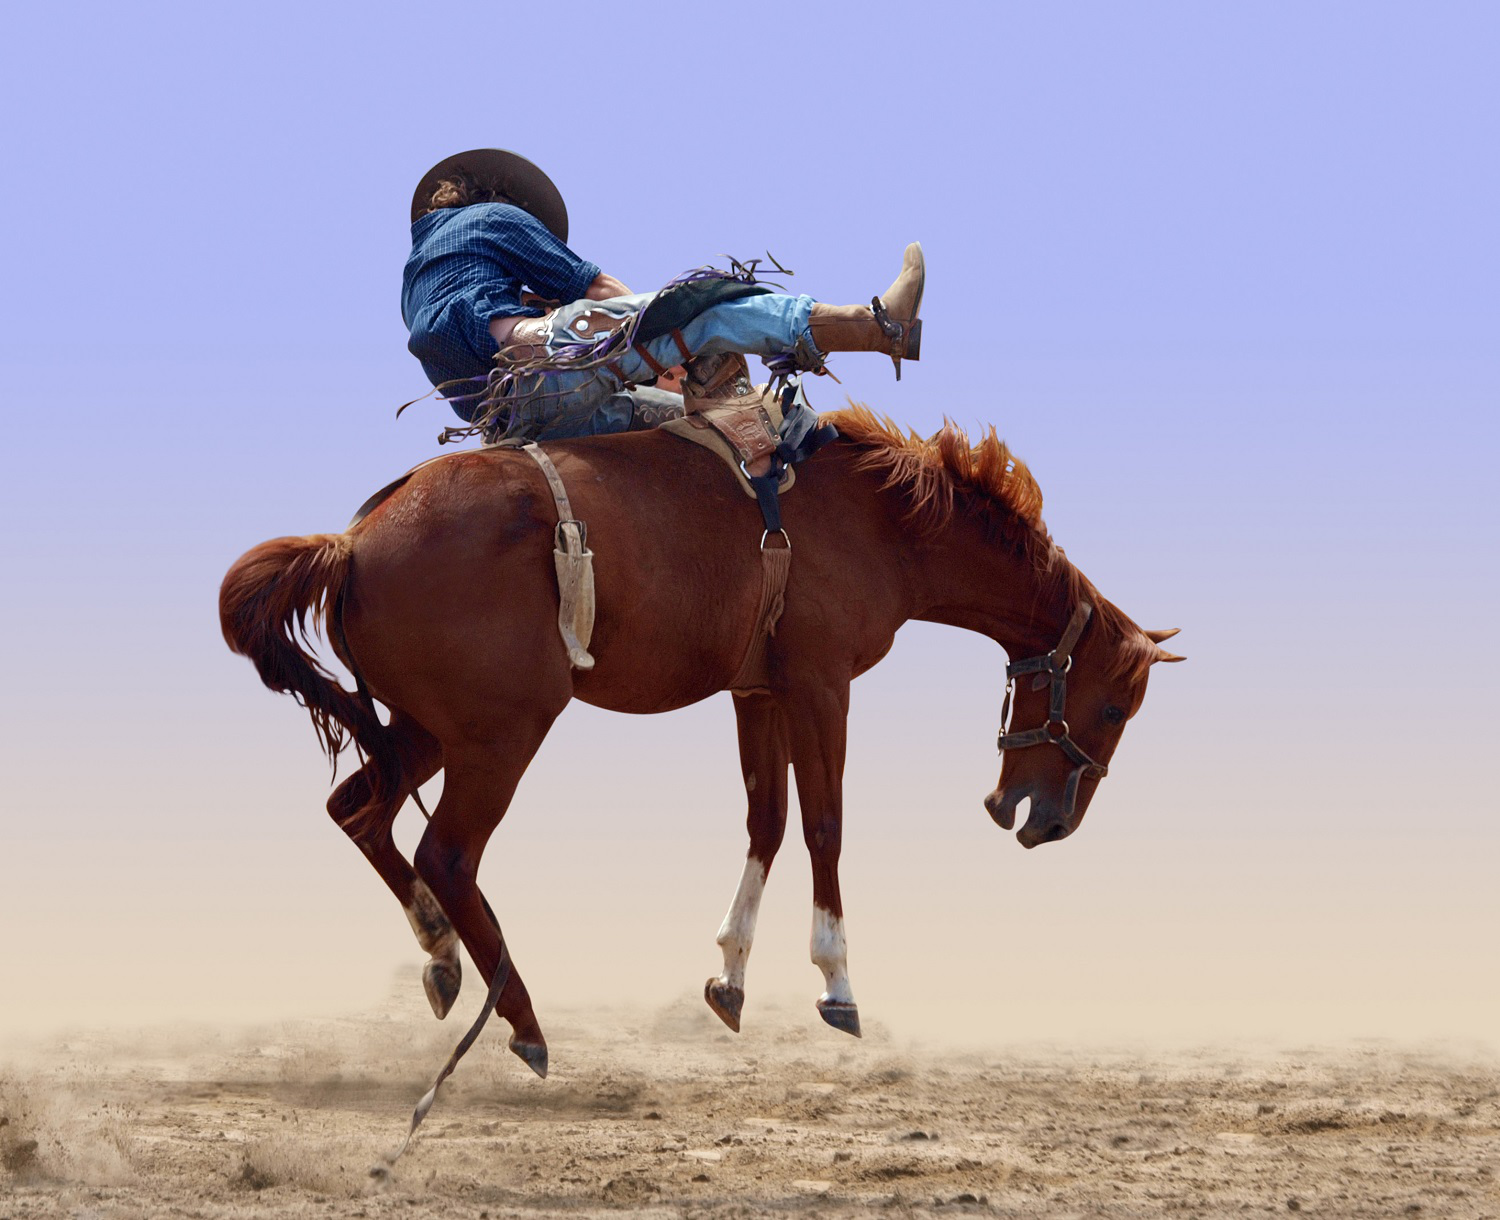

In [35]:
img

In [36]:
img_T=prepro(img)
batch_T=torch.unsqueeze(img_T,0)

In [37]:
batch_out=netG(batch_T)

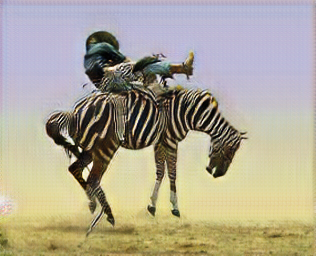

In [38]:
out_t=(batch_out.data.squeeze() + 1.0)/2.0
out_img=transforms.ToPILImage()(out_t)
out_img

# 연습문제
1. 말-얼룩말 모델에 골든 리트리버 넣기

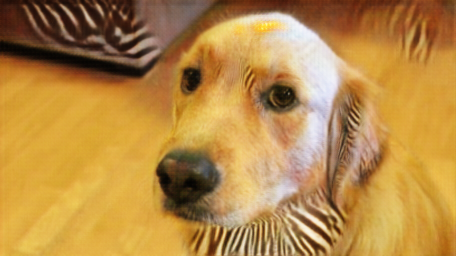

In [39]:
from PIL import Image
from torchvision import transforms

prepro=transforms.Compose([transforms.Resize(256),
                          transforms.ToTensor()])

img=Image.open('data/p1ch2/bobby.jpg')
img_T=prepro(img)
batch_T=torch.unsqueeze(img_T,0)
batch_out=netG(batch_T)
out_t=(batch_out.data.squeeze() + 1.0)/2.0
out_img=transforms.ToPILImage()(out_t)
out_img